In [2]:
# načtení potřebných modulů a zdrojové tabulky
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import csv

data = pd.read_csv("data_k_testu.csv", sep = ",")
print(data)

    ROK_JPZ             KRAJ ID_KRAJ   ROK  SUM_NAROZENI  SUM_KONALI
0      2017            Praha   CZ010  2017          9690       28025
1      2017      Středočeský   CZ020  2017         10483       12924
2      2017        Jihočeský   CZ031  2017          5733        8458
3      2017         Plzeňský   CZ032  2017          4886        7251
4      2017      Karlovarský   CZ041  2017          2949        3426
..      ...              ...     ...   ...           ...         ...
79     2022  Moravskoslezský   CZ080  2022         13373       17848
80     2023            Praha   CZ010  2023         14339       42619
81     2023        Liberecký   CZ051  2023          5220        6655
82     2023       Pardubický   CZ053  2023          5752        9325
83     2023        Jihočeský   CZ031  2023          7155       11503

[84 rows x 6 columns]


•	Nulová hypotéza H0: Narozeni v našem souboru mají normální rozdělení.
•	Alternativní hypotéza H1: Narozeni v našem souboru nemají normální rozdělení.

-> všechny kraje kromě Pardubického mají normální rozdělení (pvalue > 0.05 -> nezamítáme H0)

In [3]:
df=pd.DataFrame(data)
for kraj in df['KRAJ'].unique():

    vybrane_kraje=df[df['KRAJ'].str.contains(kraj)]  
    res = stats.shapiro((vybrane_kraje)["SUM_NAROZENI"])
    print(kraj,res)

Praha ShapiroResult(statistic=0.9521610140800476, pvalue=0.7577421069145203)
Středočeský ShapiroResult(statistic=0.8768720626831055, pvalue=0.2549985647201538)
Jihočeský ShapiroResult(statistic=0.8381620645523071, pvalue=0.1258642077445984)
Plzeňský ShapiroResult(statistic=0.8611644506454468, pvalue=0.19319689273834229)
Karlovarský ShapiroResult(statistic=0.7942489385604858, pvalue=0.05214010924100876)
Ústecký ShapiroResult(statistic=0.8704385161399841, pvalue=0.22795870900154114)
Liberecký ShapiroResult(statistic=0.8277735710144043, pvalue=0.10290996730327606)
Královéhradecký ShapiroResult(statistic=0.8608976602554321, pvalue=0.1922670304775238)
Pardubický ShapiroResult(statistic=0.7848835587501526, pvalue=0.042786840349435806)
Kraj Vysočina ShapiroResult(statistic=0.8650499582290649, pvalue=0.20717644691467285)
Jihomoravský ShapiroResult(statistic=0.8997782468795776, pvalue=0.37262099981307983)
Zlínský ShapiroResult(statistic=0.8540896773338318, pvalue=0.16979257762432098)
Moravskosl

In [4]:
# korelační matice, hodnota blízká 1 -> silná přímá lineární závislost
data_korelace = data[["SUM_NAROZENI", "SUM_KONALI"]]
print(data_korelace.corr())

              SUM_NAROZENI  SUM_KONALI
SUM_NAROZENI      1.000000    0.809596
SUM_KONALI        0.809596    1.000000


<Axes: xlabel='SUM_NAROZENI', ylabel='SUM_KONALI'>

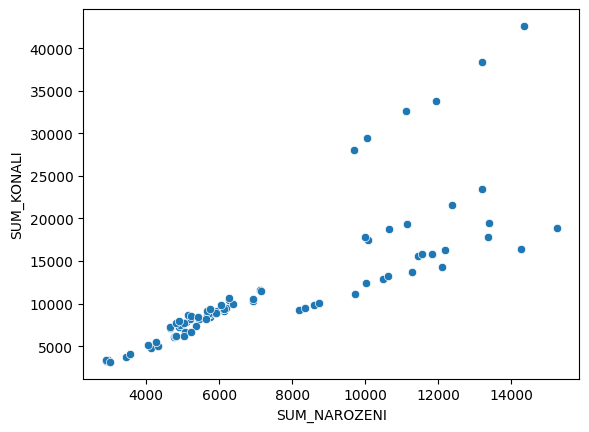

In [5]:
sns.scatterplot(data=data, x="SUM_NAROZENI", y="SUM_KONALI")

•	Nulová hypotéza HO: Neexistuje statisticky významný vztah mezi počtem narozených dětí a počtem dětí, které se budou hlásit na střední školu za 15 let od narození.
•	Alternativní hypotéza H1: Existuje statisticky významný vztah mezi počtem narozených dětí a počtem dětí, které se budou hlásit na střední školu za 15 let od narození.

In [7]:
# Test statistické významnosti: Pearson test, p-value < 0.05 -> zamítáme HO, platí H1
result = stats.pearsonr(data["SUM_NAROZENI"], data["SUM_KONALI"])
result

PearsonRResult(statistic=0.8095959399783734, pvalue=1.1490359784270138e-20)

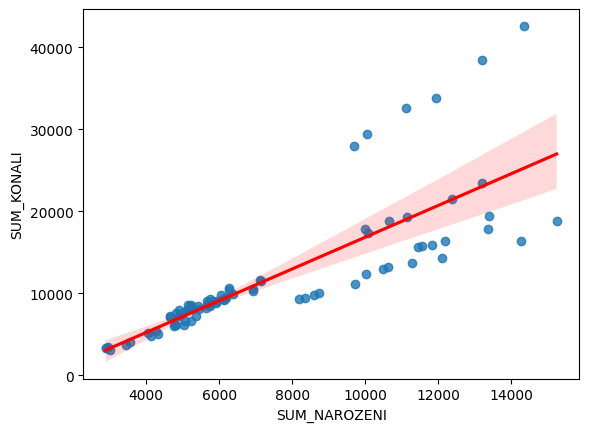

In [8]:
# Regrese
#
g = sns.regplot(data, x="SUM_NAROZENI", y="SUM_KONALI", line_kws={"color" : "red"})

In [35]:
formula = "SUM_KONALI ~ SUM_NAROZENI"
mod = smf.ols(formula=formula, data=data)
res5 = mod.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SUM_KONALI   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     156.0
Date:                Sat, 11 Nov 2023   Prob (F-statistic):           1.15e-20
Time:                        10:32:15   Log-Likelihood:                -826.13
No. Observations:                  84   AIC:                             1656.
Df Residuals:                      82   BIC:                             1661.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2485.2125   1248.204     -1.991      0.050   -4968.287      -2.138
SUM_NAROZENI     1.9343      0.155     12.490      0.000       1.626       2.242
==============================================================================
Omnibus:                       45.213   Durbin-Watson:                   2.352
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.075
Skew:                           1.842   Prob(JB):                     9.37e-29
Kurtosis:                       7.827   Cond. No.                     2.02e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
data_subset = data[["KRAJ", "ROK", "SUM_NAROZENI", "SUM_KONALI"]]


# Proveďte lineární regresi pro každý kraj zvlášť
predictions = []


for kraj in data_subset["KRAJ"].unique():
    kraj_data = data_subset[data_subset["KRAJ"] == kraj]
   
    X = sm.add_constant(kraj_data[["SUM_NAROZENI"]])
    y = kraj_data["SUM_KONALI"]


    model = sm.OLS(y, X).fit()


    # Získání predikcí pro rok 2024 pro tento kraj
    prediction = model.predict([1, kraj_data["SUM_NAROZENI"].mean()])
    predictions.append({"KRAJ": kraj, "Prediction": prediction[0], "r":model.rsquared})


# Výpis predikcí pro rok 2024
data_2024 = pd.DataFrame(predictions)
print(data_2024)

data_2024.to_csv('Predikce_2024.csv', index=False)




               KRAJ    Prediction         r
0             Praha  34162.500000  0.990048
1       Středočeský  14926.833333  0.958400
2         Jihočeský   9573.500000  0.965958
3          Plzeňský   8325.000000  0.990975
4       Karlovarský   3511.666667  0.820491
5           Ústecký  10354.500000  0.950679
6         Liberecký   5553.666667  0.902487
7   Královéhradecký   8624.500000  0.937529
8        Pardubický   8034.166667  0.961180
9     Kraj Vysočina   6769.166667  0.985304
10     Jihomoravský  19732.666667  0.989790
11          Zlínský   9207.666667  0.956238
12  Moravskoslezský  16824.000000  0.877692
13        Olomoucký   9659.333333  0.920916


In [30]:
X

,const,SUM_NAROZENI
20,1.0,5830
26,1.0,5667
39,1.0,6183
43,1.0,6931
52,1.0,5913
71,1.0,7118


In [32]:
y

20     9076
26     8599
39     9494
43    10325
52     8878
71    11584
Name: SUM_KONALI, dtype: int64

In [29]:
model.summary()

c:\Users\JVitek\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SUM_KONALI   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     46.58
Date:                Sat, 11 Nov 2023   Prob (F-statistic):            0.00241
Time:                        10:19:22   Log-Likelihood:                -42.471
No. Observations:                   6   AIC:                             88.94
Df Residuals:                       4   BIC:                             88.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1411.8833   1628.516     -0.867      0.435   -5933.369    3109.602
SUM_NAROZENI     1.7647      0.259      6.825      0.002       1.047       2.483
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.483
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.149
Skew:                          -0.238   Prob(JB):                        0.928
Kurtosis:                       2.393   Cond. No.                     7.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""